# Activity 1.3 : Regularization

**Name**: Almodiel, Mj Spencer <br>
**Instructor**: Engr. Roman Richard <br>

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [4]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [11]:
x_train[0].shape

(28, 28)

Check the sample train data

In [12]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

Check the corresponding label in the training set

In [13]:

y_train[333]

8

Check the actual image

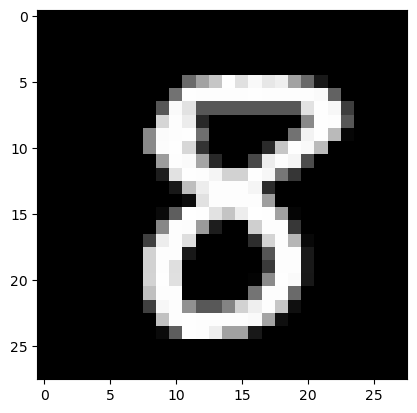

In [14]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [15]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [16]:
len(x_train)

60000

* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [6]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [7]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [19]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Dropout is a regularization technique used to avoid overfitting in neural networks. With a parameter 0f 20%, a random 20% of the input data values will be set to 0 to avoid overfitting. 2 dropout layer are added to the first 2 dense layer.

Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [21]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30



469/469 [==============================] - 5s 8ms/step - loss: 0.5059 - accuracy: 0.8478 - val_loss: 0.2017 - val_accuracy: 0.9387
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2472 - accuracy: 0.9273 - val_loss: 0.1435 - val_accuracy: 0.9574
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1953 - accuracy: 0.9419 - val_loss: 0.1239 - val_accuracy: 0.9609
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1730 - accuracy: 0.9493 - val_loss: 0.1140 - val_accuracy: 0.9658
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1562 - accuracy: 0.9537 - val_loss: 0.1048 - val_accuracy: 0.9689
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1412 - accuracy: 0.9581 - val_loss: 0.1013 - val_accuracy: 0.9709
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1327 - accuracy: 0.9607 - val_loss: 0.0993 - val_accuracy: 0.9712
Epoch 8/30
469/46

Use Keras evaluate function to evaluate performance on the test set

In [22]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10495549440383911
Test accuracy: 0.9769999980926514


Interpret the result

#type your answer here

In [11]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

NameError: name 'history' is not defined

Interpret the result.

- As the number of epochs increases, the loss in training reaches below 0.1 loss, compared to validation which seems to plateau after 5-10 epochs. In cross entropy loss, there might be a hint of overfitting because towards the end, training loss is lower compared to validation loss. Increasing the number of epochs should increase the gap between validation and training loss. In terms of accuracy, the model performed well with approximately 98% accuracy at 30 epochs.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [26]:
# Two hidden layers
model_1 = Sequential()
model_1.add(Dense(400, activation= 'relu', input_shape=(784,)))    # first hidden layer with size 400
model_1.add(Dropout(0.4))   # first dropout with 40% 
model_1.add(Dense(300, activation='relu', input_shape=(784,)))     # second hidden layer with size 300
model_1.add(Dropout(0.4))   # second dropout with 40%

# Since MNIST dataset is a multi-class classification problem, softmax will be the output activation function
model_1.add(Dense(10, activation='softmax'))    # output layer with 10 outputs using softmax activation

In [31]:
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
            optimizer=RMSprop(lr=learning_rate),
            metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 20 # use 20 epochs for model_1
model_1_hist = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.0560 - accuracy: 0.9841 - val_loss: 0.0737 - val_accuracy: 0.9815
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0521 - accuracy: 0.9847 - val_loss: 0.0672 - val_accuracy: 0.9829
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0497 - accuracy: 0.9853 - val_loss: 0.0728 - val_accuracy: 0.9829
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0491 - accuracy: 0.9854 - val_loss: 0.0700 - val_accuracy: 0.9827
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0466 - accuracy: 0.9861 - val_loss: 0.0725 - val_accuracy: 0.9834
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0422 - accuracy: 0.9871 - val_loss: 0.0794 - val_accuracy: 0.9831
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0401 - accuracy: 0.9881 - val_loss: 0.0732 - val_accuracy: 0.9830
Epoch 

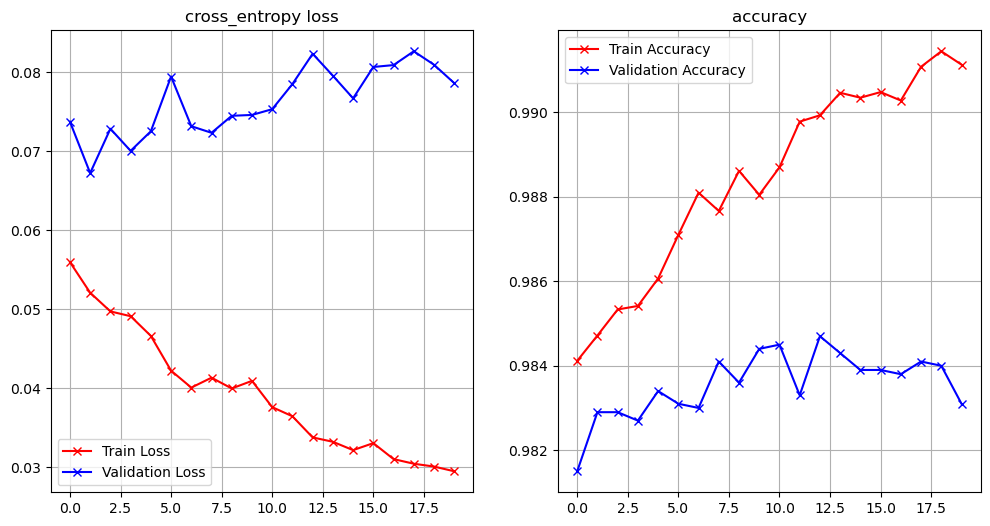

In [33]:
# let's plot model_1 loss and accuracy
plot_loss_accuracy(model_1_hist)


- At first, it may seem that there is HUGE overfitting within the training loss, but it's actually only approx. 0.04 difference in training and validation loss. There might be a tiny overfitting but this can be solved in improving the model's parameters. Increasing the size in building the model helped the performance of model to increase compared to the model created in the procedure. The accuracy of training almost reached 100% accuracy compared to 98.3% validation accuracy at 20 epochs. Tinkering with the parameter of Regularization (Dropout) will definitely decrease the hint of overfitting existing in model_1.

6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [35]:
# Build model_2 with dropout and l2 regularization
model_2 = Sequential()
model_2.add(Dense(220, activation= 'relu', input_shape=(784,)))
model_2.add(Dropout(0.2))
model_2.add(Dense(420, activation= 'relu', input_shape=(784,), kernel_regularizer='l2'))
model_2.add(Dropout(0.2))

model_2.add(Dense(10, activation='softmax'))

- Let's try hypertuning the parameters for optimal model

In [42]:
learning_rates = [0.001, 0.01, 0.1] # Different learning rates
epochs = [20, 25, 30]
neuron_size = [200, 300, 400]  # Number of neurons in hidden layers
dropout_val = [0.2, 0.3, 0.4]


best_acc = 0
best_model = None
best_param = {}

for neuron in neuron_size:
    for val in dropout_val:
        # create model
        model_2 = Sequential()
        model_2.add(Dense(neuron, activation='relu', input_shape=(784,)))
        model_2.add(Dropout(val))
        model_2.add(Dense(round(neuron * 1.5, 0), activation= 'relu', input_shape=(784,)))
        model_2.add(Dropout(val))

        # output layer
        model_2.add(Dense(10, activation='softmax'))

        # Compile model
        model_2.compile(loss='categorical_crossentropy',
                        optimizer=RMSprop(lr=0.001), 
                        metrics=['accuracy'])

        # Train model
        model_2.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    verbose=1,
                    validation_data=(x_test, y_test))

        # Evaluate model
        _, accuracy = model_2.evaluate(x_test, y_test, verbose=0)

        # Check if this model is the best so far
        if accuracy > best_acc:
            best_acc = accuracy
            best_model = model_2
            best_param = {'neuron_size': neuron,
                                'dropout_value': val}

Epoch 1/30
469/469 [==============================] - 5s 8ms/step - loss: 0.3172 - accuracy: 0.9054 - val_loss: 0.1372 - val_accuracy: 0.9574
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1356 - accuracy: 0.9585 - val_loss: 0.0917 - val_accuracy: 0.9714
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0993 - accuracy: 0.9693 - val_loss: 0.0878 - val_accuracy: 0.9728
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0829 - accuracy: 0.9747 - val_loss: 0.0739 - val_accuracy: 0.9772
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0713 - accuracy: 0.9780 - val_loss: 0.0749 - val_accuracy: 0.9781
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0616 - accuracy: 0.9806 - val_loss: 0.0720 - val_accuracy: 0.9796
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0546 - accuracy: 0.9827 - val_loss: 0.0721 - val_accuracy: 0.9789
Epoch 

Epoch 1/30
469/469 [==============================] - 4s 8ms/step - loss: 0.3460 - accuracy: 0.8955 - val_loss: 0.1291 - val_accuracy: 0.9581
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1553 - accuracy: 0.9531 - val_loss: 0.1003 - val_accuracy: 0.9686
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1208 - accuracy: 0.9636 - val_loss: 0.0873 - val_accuracy: 0.9739
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1030 - accuracy: 0.9692 - val_loss: 0.0735 - val_accuracy: 0.9770
Epoch 5/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0901 - accuracy: 0.9732 - val_loss: 0.0704 - val_accuracy: 0.9797
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0810 - accuracy: 0.9750 - val_loss: 0.0804 - val_accuracy: 0.9770
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0748 - accuracy: 0.9773 - val_loss: 0.0669 - val_accuracy: 0.9818
Epoch 

Epoch 1/30
469/469 [==============================] - 4s 8ms/step - loss: 0.3964 - accuracy: 0.8788 - val_loss: 0.1524 - val_accuracy: 0.9547
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1881 - accuracy: 0.9437 - val_loss: 0.1168 - val_accuracy: 0.9653
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1498 - accuracy: 0.9557 - val_loss: 0.0927 - val_accuracy: 0.9719
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1287 - accuracy: 0.9616 - val_loss: 0.0830 - val_accuracy: 0.9746
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1151 - accuracy: 0.9662 - val_loss: 0.0843 - val_accuracy: 0.9745
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1059 - accuracy: 0.9685 - val_loss: 0.0810 - val_accuracy: 0.9768
Epoch 7/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0971 - accuracy: 0.9712 - val_loss: 0.0795 - val_accuracy: 0.9785
Epoch 

Epoch 1/30
469/469 [==============================] - 4s 7ms/step - loss: 0.2833 - accuracy: 0.9138 - val_loss: 0.1369 - val_accuracy: 0.9580
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1208 - accuracy: 0.9629 - val_loss: 0.0918 - val_accuracy: 0.9715
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0861 - accuracy: 0.9736 - val_loss: 0.0815 - val_accuracy: 0.9747
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0683 - accuracy: 0.9789 - val_loss: 0.0714 - val_accuracy: 0.9774
Epoch 5/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0573 - accuracy: 0.9823 - val_loss: 0.0745 - val_accuracy: 0.9789
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.0638 - val_accuracy: 0.9824
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.0686 - val_accuracy: 0.9813
Epoch 

Epoch 1/30
469/469 [==============================] - 4s 8ms/step - loss: 0.3045 - accuracy: 0.9068 - val_loss: 0.1268 - val_accuracy: 0.9601
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1365 - accuracy: 0.9592 - val_loss: 0.0967 - val_accuracy: 0.9703
Epoch 3/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1026 - accuracy: 0.9694 - val_loss: 0.0800 - val_accuracy: 0.9746
Epoch 4/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0859 - accuracy: 0.9738 - val_loss: 0.0699 - val_accuracy: 0.9786
Epoch 5/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0725 - accuracy: 0.9776 - val_loss: 0.0714 - val_accuracy: 0.9791
Epoch 6/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0647 - accuracy: 0.9797 - val_loss: 0.0725 - val_accuracy: 0.9791
Epoch 7/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0571 - accuracy: 0.9822 - val_loss: 0.0622 - val_accuracy: 0.9814
Epoch 

Epoch 1/30
469/469 [==============================] - 4s 7ms/step - loss: 0.3387 - accuracy: 0.8961 - val_loss: 0.1406 - val_accuracy: 0.9565
Epoch 2/30
469/469 [==============================] - 4s 7ms/step - loss: 0.1591 - accuracy: 0.9524 - val_loss: 0.0891 - val_accuracy: 0.9732
Epoch 3/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1251 - accuracy: 0.9621 - val_loss: 0.0872 - val_accuracy: 0.9737
Epoch 4/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1068 - accuracy: 0.9687 - val_loss: 0.0765 - val_accuracy: 0.9781
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0950 - accuracy: 0.9715 - val_loss: 0.0744 - val_accuracy: 0.9785
Epoch 6/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0860 - accuracy: 0.9748 - val_loss: 0.0737 - val_accuracy: 0.9796
Epoch 7/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0790 - accuracy: 0.9765 - val_loss: 0.0728 - val_accuracy: 0.9794
Epoch 

Epoch 1/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2657 - accuracy: 0.9194 - val_loss: 0.1019 - val_accuracy: 0.9686
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1075 - accuracy: 0.9675 - val_loss: 0.1050 - val_accuracy: 0.9663
Epoch 3/30
469/469 [==============================] - 3s 5ms/step - loss: 0.0780 - accuracy: 0.9761 - val_loss: 0.0800 - val_accuracy: 0.9761
Epoch 4/30
469/469 [==============================] - 3s 5ms/step - loss: 0.0601 - accuracy: 0.9816 - val_loss: 0.0732 - val_accuracy: 0.9797
Epoch 5/30
469/469 [==============================] - 3s 5ms/step - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.0597 - val_accuracy: 0.9827
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0733 - val_accuracy: 0.9791
Epoch 7/30
469/469 [==============================] - 3s 5ms/step - loss: 0.0362 - accuracy: 0.9880 - val_loss: 0.0696 - val_accuracy: 0.9821
Epoch 

Epoch 1/30
469/469 [==============================] - 5s 9ms/step - loss: 0.2821 - accuracy: 0.9146 - val_loss: 0.1177 - val_accuracy: 0.9646
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1250 - accuracy: 0.9619 - val_loss: 0.0890 - val_accuracy: 0.9712
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0940 - accuracy: 0.9710 - val_loss: 0.0756 - val_accuracy: 0.9754
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0776 - accuracy: 0.9764 - val_loss: 0.0737 - val_accuracy: 0.9787
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0641 - accuracy: 0.9803 - val_loss: 0.0625 - val_accuracy: 0.9808
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0566 - accuracy: 0.9824 - val_loss: 0.0668 - val_accuracy: 0.9815
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0509 - accuracy: 0.9839 - val_loss: 0.0746 - val_accuracy: 0.9792
Epoch 

Epoch 1/30
469/469 [==============================] - 3s 6ms/step - loss: 0.3082 - accuracy: 0.9064 - val_loss: 0.1265 - val_accuracy: 0.9602
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1465 - accuracy: 0.9560 - val_loss: 0.0875 - val_accuracy: 0.9722
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1125 - accuracy: 0.9664 - val_loss: 0.0772 - val_accuracy: 0.9753
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0927 - accuracy: 0.9723 - val_loss: 0.0818 - val_accuracy: 0.9766
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0841 - accuracy: 0.9751 - val_loss: 0.0636 - val_accuracy: 0.9814
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0729 - accuracy: 0.9779 - val_loss: 0.0710 - val_accuracy: 0.9804
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0669 - accuracy: 0.9799 - val_loss: 0.0685 - val_accuracy: 0.9822
Epoch 

In [58]:
# prints the best parameters for model building
print(f"Best accuracy: {best_acc}")
model_2 = best_model
model_2.summary()

Best accuracy: 0.9861999750137329
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 400)               314000    
                                                                 
 dropout_35 (Dropout)        (None, 400)               0         
                                                                 
 dense_54 (Dense)            (None, 600)               240600    
                                                                 
 dropout_36 (Dropout)        (None, 600)               0         
                                                                 
 dense_55 (Dense)            (None, 10)                6010      
                                                                 
Total params: 560610 (2.14 MB)
Trainable params: 560610 (2.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________

In [26]:
# Two hidden layers
model_2 = Sequential()
model_2.add(Dense(400, activation= 'relu', input_shape=(784,)))    # first hidden layer with size 400
model_2.add(Dropout(0.25))
model_2.add(Dense(600, activation='relu', input_shape=(784,), kernel_regularizer='l2'))     # second hidden layer with size 300
model_2.add(Dropout(0.25))   

# Since MNIST dataset is a multi-class classification problem, softmax will be the output activation function
model_2.add(Dense(10, activation='softmax'))    # output layer with 10 outputs using softmax activation

- Let's now hypertune parameters for model compiling

In [2]:
# learning_rates = [0.001, 0.01, 0.005] # Different learning rates
# epochs = [20, 25, 30]

# best_parameters = {}
# best_ac = 0
# for lr in learning_rates:
#     for e in epochs:
#         model_2.compile(loss='categorical_crossentropy',
#                         optimizer=RMSprop(learning_rate = lr),
#                         metrics=['accuracy'])
#         model_2_hist = model_2.fit(
#             x_train, y_train,
#             batch_size = 128,
#             epochs = e,
#             verbose = 1,
#             validation_data= (x_test, y_test)
#         )
        
#         _, accuracy = model_2.evaluate(x_test, y_test, verbose=0)

#             # Check if this model is the best so far
#         if accuracy > best_ac:
#             best_accuracy = accuracy
#             best_parameters = {'learning_rate' : lr,
#                                 'epoch' : e}

NameError: name 'model_2' is not defined

In [36]:
learning_rate = 0.001
model_2.compile(loss='categorical_crossentropy',
            optimizer=RMSprop(lr=learning_rate),
            metrics=['accuracy'])
batch_size = 256  # mini-batch with 128 examples
epochs = 30
model_2_hist = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
143/235 [=================>............] - ETA: 1s - loss: 0.0281 - accuracy: 0.9961

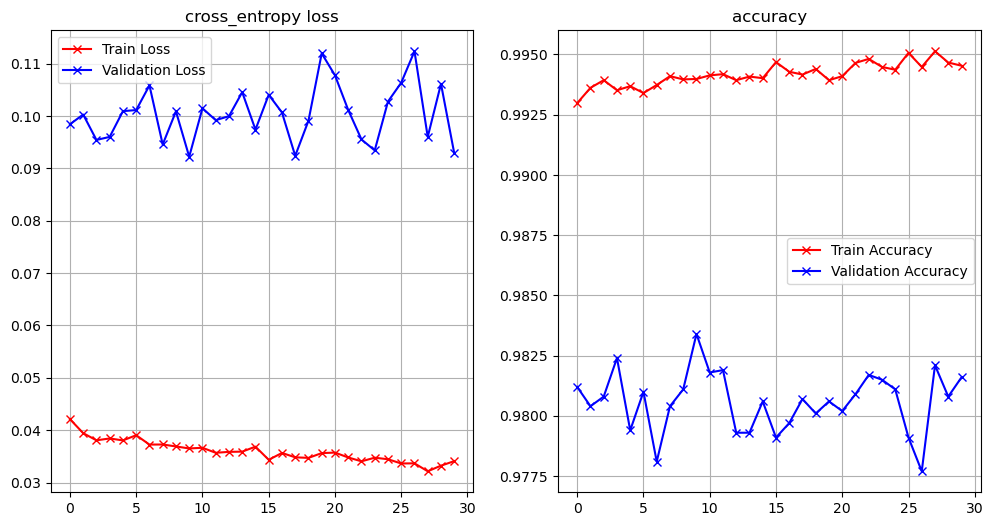

In [ ]:
plot_loss_accuracy(model_2_hist)

#### Conclusion

#type your answer here

- After performing the supplementary activity, applying regularization is really important in building models in Neural Networks. As data gets more complex, or the model gets more complex with lots of hidden layers, the model may fail to generalize to new or unseen data. In other terms, the model may overfit. It is a common problem to encounter especially in neural networks. That is why applying regularization will help prevent or lessen overfitting by adding a penalty to the loss function. What this means is that it discourages the model by putting **too** much importance on one feature. This reduce the model's tendency to overfit, thus making it more robust to noisy or unseen data.